# <center> SAT 5114</center>

## <center>DL to Detect a tumor in the brain from an MRI image utilizing python</center>

#### Team Members - 
#### Goutham Thota, Tejaswi Chintapalli, Shalaka Gaidhani

Let's first install and import all the required libraries and functions.

In [ ]:
!pip install opencv-python-headless
!pip install tensorflow
!pip install tabulate

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score
import tensorflow as tf
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from sklearn import svm



**Loading the dataset**<br>
- The dataset we have has 2 folders for tumor 'yes' and 'no'.
- We have stored both folders under \dataset folder.
- For loading the dataset, we will use the path for \dataset folder and store it in directory.
- We will then read all the image files within each patient directory using cv2.imread function.
- Every image file is stored in a list called 'images'.
- Labels are set based on the file names and stored in the 'labels' list.
- If the word "no" is present in the filename, the label is set to 0 (indicating no tumor), otherwise the label is set to 1 (indicating presence of tumor).

In [ ]:
#Loading the dataset
data_dir = '/Users/HP/Desktop/AI Health/BrainTumor/archive/dataset/' 
images = []
labels = []
for patient in os.listdir(data_dir):
    for image_file in os.listdir(os.path.join(data_dir, patient)):
        image_path = os.path.join(data_dir, patient, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
       
        if image is not None:
            images.append(image)
            labels.append(0 if 'no' in image_file else 1)
print(images)


[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       ...,
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16]], dtype=uint8), array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0

**Resizing and Normalizing the images**<br>
- We resize each image in the images list using the cv2.resize() function to a specified size of (256, 256) pixels. 
- The resized images are stored in the 'resized_images list'.
- We then normalize each image in the resized_images list by subtracting the minimum pixel value and dividing by (maximum pixel value - minimum pixel value). This gives us pixel values for each image scaled to a range of 0 to 1. 
- The normalized images are stored in the 'normalized_images list'.

In [ ]:
image_size = (256, 256)
resized_images = [cv2.resize(image, image_size) for image in images]
normalized_images = [(image - np.min(image)) / (np.max(image) - np.min(image)) for image in resized_images]
print(resized_images)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       ...,
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16]], dtype=uint8), array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0

**Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

 - *normalized_images* is the list of preprocessed images, and labels is the list of corresponding labels (0 for no tumor and 1 for tumor).
 - *train_test_split()* function from scikit-learn is used to randomly split the data into training set and test set. 
     - The function takes four arguments:
        - normalized_images: The features or input data to be split.
        - labels: The labels to be split.
        - test_size: test set is set to 0.3, which means 30% of the data will be used for testing and the remaining 70% will be used for training.
        - random_state: same split is obtained every time the code is run.
    
   - The function returns four outputs:
       - X_train: The training set of features.
       - X_test: The test set of features.
       - y_train: The training set of labels.
       - y_test: The test set of labels.

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels, test_size=0.3, random_state=42)

### Visualizing the augmented images

MRI scans that possibly have **tumor** in them

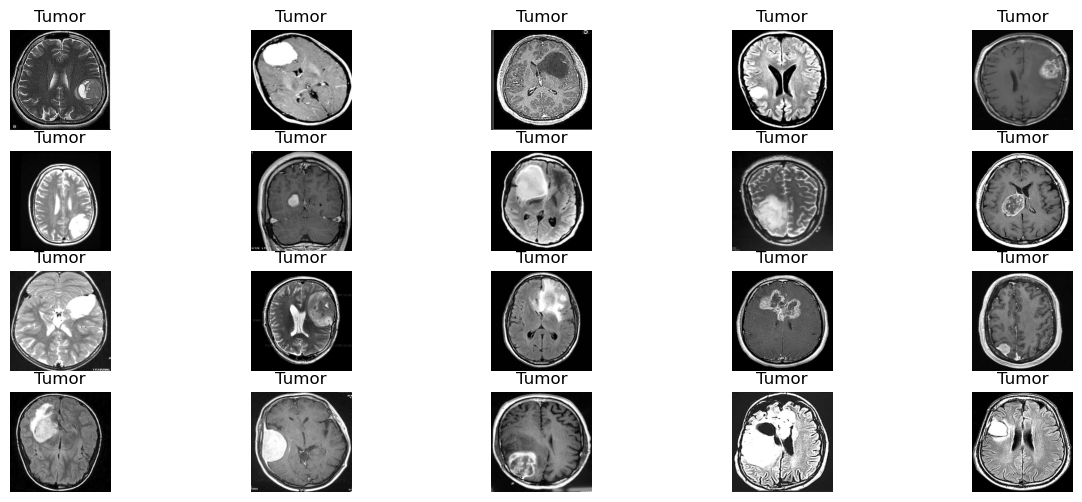

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
axes = axes.ravel()

# initialize a variable to limit number of tumor images to be displayed
num = 0


for i in range(len(X_test)):
    # if current image has a tumor
    if y_test[i] == 1:
        # display it next
        axes[num].imshow(X_test[i], cmap='gray')
        axes[num].axis('off')
        axes[num].set_title('Tumor')
        # increment the number of tumor images displayed
        num += 1
        # stop if all the tumor images are displayed
        if num == 20:
            break

# display the remaining plots as empty
while num < 20:
    axes[num].axis('off')
    num += 1

plt.show()


MRI scans that possibly **do not** have **tumor** in them

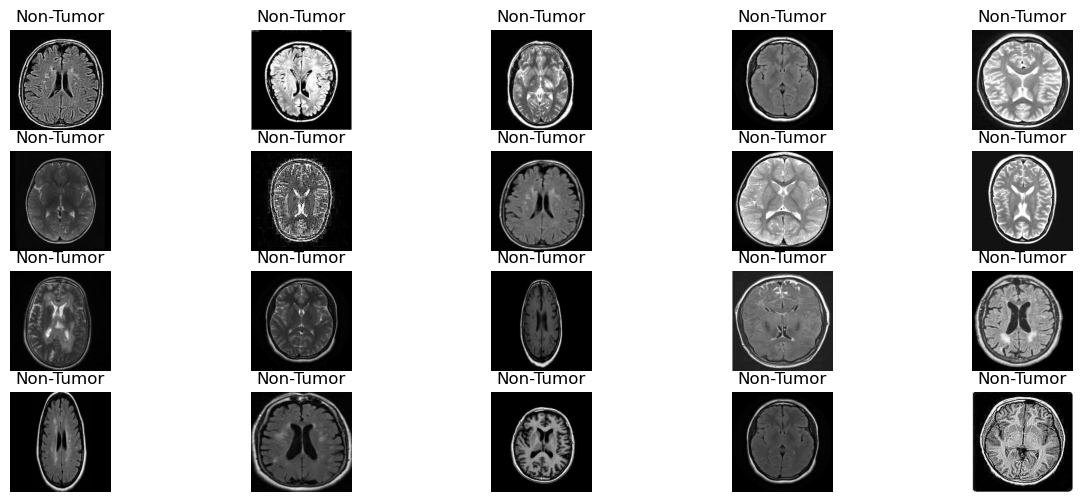

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
axes = axes.ravel()
num = 0
for i in range(len(X_test)):
    # if current image does not have tumor
    if y_test[i] == 0:
        axes[num].imshow(X_test[i], cmap='gray')
        axes[num].axis('off')
        axes[num].set_title('Non-Tumor')
        num += 1
        if num == 20:
            break
while num < 20:
    axes[num].axis('off')
    num += 1

plt.show()


**Performance of the model**<br>
We will be meausuring our model with SVM, CNN and adaboost for better accuracy.<br>

1. **SVM**<br>
    - The SVM classifier expects a two-dimensional array as input.<br>
    - The images in our dataset are three-dimensional arrays because they are grayscale images with a height, width, and a single channel. 
    - To use the SVM classifier, we have to flatten the images into one-dimensional arrays by reshaping method PCA.<br>

In [ ]:
# Convert list to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape numpy array
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
# Apply PCA on training data
pca = PCA(n_components=100)

X_train_pca = pca.fit_transform(X_train_flat)

# Apply PCA on test data
X_test_pca = pca.transform(X_test_flat)

# Apply SVM classifier on the transformed data
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_pca, y_train)

# Predict labels on the test set
y_pred = svm_classifier.predict(X_test_pca)

# Performance of the classifier using accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)

# Calculate recall for all classes
recall = recall_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Recall:', recall)
svm_acc = accuracy
svm_rec = recall

Accuracy: 0.9222222222222223
Recall: 0.9219243252856699


2. **CNN**<br>
 - Define the model architecture using TensorFlow's Keras API to classify brain MRI images as either having a tumor or not.
 - compile the model with hyperparameters.
 - Convert & expand the data. The tf.constant function is used to convert the data to a TensorFlow constant tensor, and tf.expand_dims function is used to add an additional dimension to the data to match the input shape of the CNN model architecture.
 - The model is then trained on the training data for 2 epochs with a batch size of 32, and validated on the test data. 

In [ ]:
# Define the CNN model architecture using tf keras
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall()])

# Convert and expand the training and test data
X_train = tf.constant(X_train, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
X_train = tf.expand_dims(X_train, axis=-1)

X_test = tf.constant(X_test, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)
X_test = tf.expand_dims(X_test, axis=-1)

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))

# Accuracy and recall
loss, accuracy, recall = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)
print("Recall:", recall)
cnn_acc = accuracy
cnn_rec = recall

Epoch 1/2
66/66 [==============================] - 117s 2s/step - loss: 1.0416 - accuracy: 0.6833 - recall: 0.8030 - val_loss: 0.4199 - val_accuracy: 0.7944 - val_recall: 0.9161
Epoch 2/2
29/29 [==============================] - 12s 418ms/step - loss: 0.1877 - accuracy: 0.9356 - recall: 0.9637
Accuracy: 0.9355555772781372
Recall: 0.963718831539154


3. **Adaboost**<br>
    - Adaboost requires 2D/1D images whereas, our data has 3D images hence, we will have to flatten this images similar to what we did in SVM using PCA for dimensionality reduction.
    - AdaBoost has base_esmitors as a DecisionTree hence, we initialized a DT classifier with maximum depth 1.
    - We then train AdaBoost classifier using 50 decision trees as weak classifiers, learning rate of 0.5, and the SAMME.R algorithm for multi-class exponential loss function on transformed training data X_train_pca and y_train.
    - Calculated the performance metrics.

In [ ]:

# Apply PCA to the training data
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_flat)

# Apply the same PCA transformation to the test data
X_test_pca = pca.transform(X_test_flat)
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
ada = AdaBoostClassifier(base_estimator=dtree,
                            n_estimators=50,
                            learning_rate=0.5,
                            algorithm='SAMME.R', #Stagewise Additive Modeling using a Multi-class Exponential loss function
                            random_state=1)

ada.fit(X_train_pca, y_train)

ada_train_sc = accuracy_score(y_train, ada.predict(X_train_pca))
ada_test_sc = accuracy_score(y_test, ada.predict(X_test_pca))
ada_rec = recall_score(y_test, ada.predict(X_test_pca), average='macro')
print('AdaBoost train accuracy %.3f' % (ada_train_sc))
print('AdaBoost test accuracy %.3f' % (ada_test_sc))
print('AdaBoost test recall %.3f' % (ada_rec))

AdaBoost train accuracy 0.899
AdaBoost test accuracy 0.874
AdaBoost test recall 0.874


#### Visualization of the model

We will now compare the performances of SVM, CNN and Adaboost and visualize it using a bar plot.

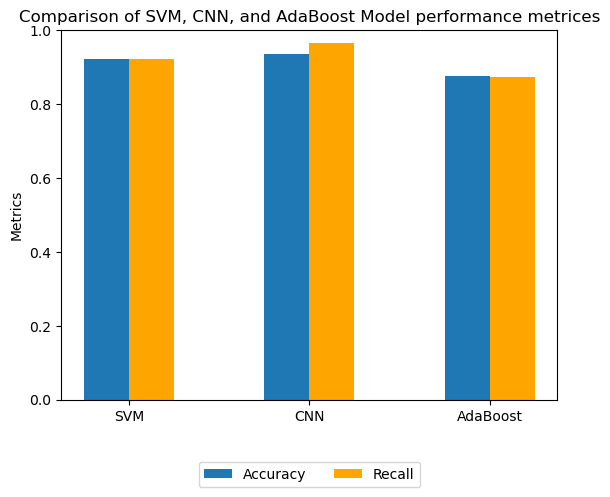

In [ ]:

# Grouped bar plot
models = ['SVM', 'CNN', 'AdaBoost']
accuracy = [svm_acc, cnn_acc, ada_test_sc]
recall = [svm_rec, cnn_rec, ada_rec]

fig, ax = plt.subplots()
width = 0.25
x = np.arange(len(models))
accuracy_colors = ['tab:blue']
recall_colors = ['tab:lightblue']
ax.bar(x - width/2, accuracy, width, label='Accuracy')
ax.bar(x + width/2, recall, width, label='Recall',color='orange')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2) #To avoid overlapping og legend on graph
ax.set_ylim([0,1])
ax.set_ylabel('Metrics')
ax.set_title('Comparison of SVM, CNN, and AdaBoost Model performance metrices')
plt.show()





In [ ]:
table = [
    ["SVM", svm_acc, svm_rec],
    ["CNN", cnn_acc, cnn_rec],
    ["AdaBoost", ada_test_sc, ada_rec]
]

headers = ["Model", "Accuracy", "Recall"]

print(tabulate(table, headers=headers))


Model       Accuracy    Recall
--------  ----------  --------
SVM         0.922222  0.921924
CNN         0.935556  0.963719
AdaBoost    0.874444  0.873927
